In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchvision

In [2]:
import pydicom
test_img = "../data/rsna-2024-lumbar-spine-degenerative-classification/train_images/4003253/702807833/8.dcm"
test_img = pydicom.read_file(test_img).pixel_array

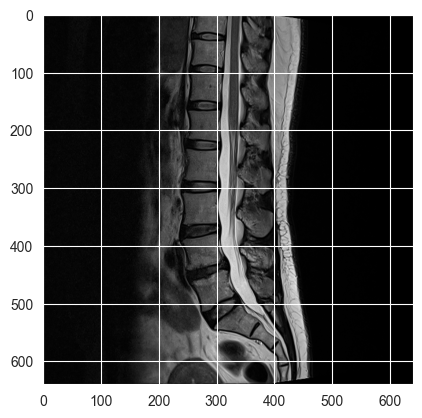

In [3]:
plt.imshow(test_img, cmap="gray")

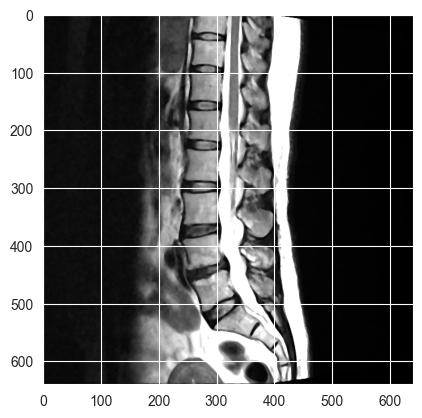

In [4]:
import cv2

cvt_img = cv2.convertScaleAbs(test_img)
blurred_img = cv2.medianBlur(cvt_img, ksize=5)

plt.imshow(blurred_img, cmap="gray")

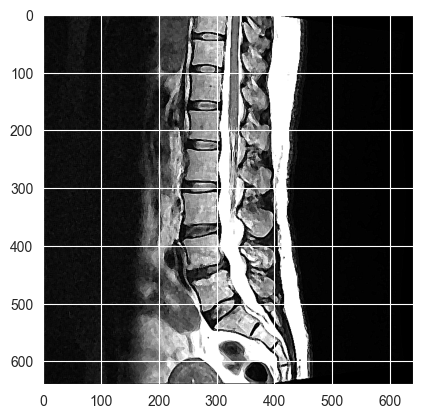

In [5]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_img = cv2.filter2D(blurred_img, -1, kernel)

plt.imshow(sharpened_img, cmap="gray")

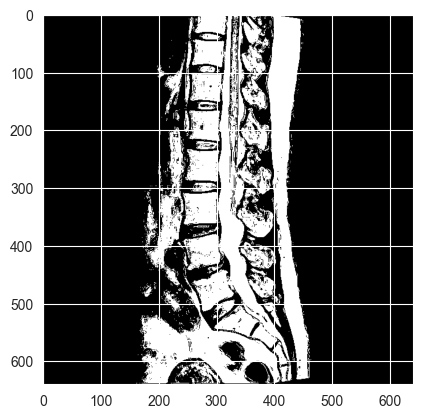

In [6]:
ret, binary_image = cv2.threshold(sharpened_img, 0, 255, cv2.THRESH_OTSU)

plt.imshow(binary_image, cmap="gray")

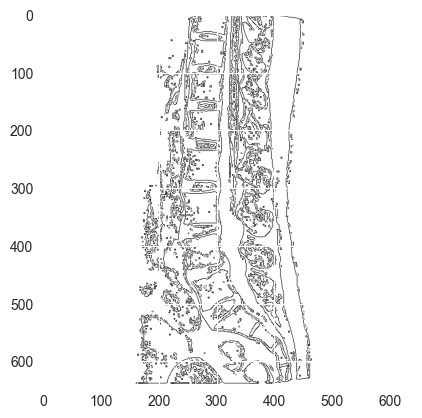

In [11]:
th = 220

canny_out = cv2.Canny(binary_image, th, th * 2, L2gradient=True)
plt.imshow(canny_out, cmap="gist_yarg")

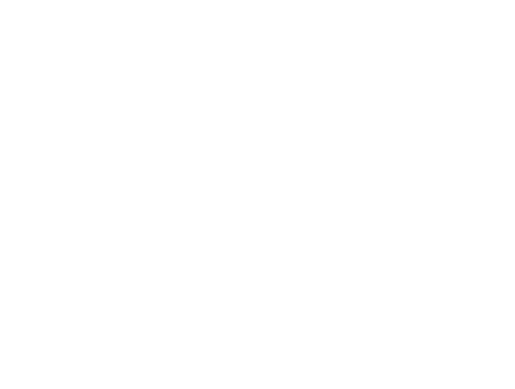

In [12]:
plt.grid(False)
plt.axis('off')
plt.imsave("test.png", canny_out, cmap="gist_yarg")

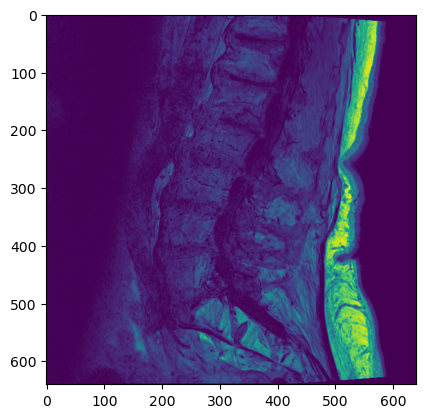

In [14]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pydicom

# paths = glob("../../data/rsna-2024-lumbar-spine-degenerative-classification/train_images/4003253/702807833/*.dcm")
# paths = glob("../../data/rsna-2024-lumbar-spine-degenerative-classification/train_images/4003253/1054713880/*.dcm")

paths = glob("../../data/rsna-2024-lumbar-spine-degenerative-classification/test_images/44036939/2828203845/*.dcm")

all_imgs = np.min([np.array(pydicom.dcmread(path).pixel_array) for path in paths], axis=0)

plt.imshow(all_imgs)